# Linear Regression using python

## - What is Linear regression ?

**- Linear regression is a supervised learning algorithm used to predict a numeric (continuous) output based on one or more input variables.
 It tries to draw the best straight line (in 2D) or flat plane (in more dimensions) through your data to estimate the relationship between input(s) and 
 output.**

## - Math behind linear regression

For one input (simple linear regression): 

   **y = wx+b**
   
y: predicted value

x: input value

w: weight (slope of the line)

b: bias (y-intercept)

For multiple inputs (multiple linear regression):

**y =w1x1 + w2x2 +⋯+ wnxn + b**

***The goal is to find values of 𝑤 and b that make the predictions y as close as possible to the true values 𝑦 . This is usually done by minimizing the Mean Squared Error (MSE).***

## Gradient descent: 

Initialize weights and bias

Use gradient descent to update:

𝑤 ← 𝑤 − 𝛼 ∂Loss/∂w

𝑏 ← 𝑏 − 𝛼 ∂Loss/∂b 

Repeat for many epochs

Loss = Mean Squared Error (MSE)


 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

In [56]:
# Linear regression
class LinearRegression():

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # function for model training

    def fit(self, X, Y):
         # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning
        for i in range(self.epochs):
            if i % 500 == 0:
                loss = np.mean((self.Y - self.predict(self.X)) ** 2)
                print(f"Epoch {i}, Loss: {loss}")
            self.update_weights()
            
        return self

     # Helper function to update weights in gradient descent
    def update_weights(self):

        Y_pred = self.predict(self.X)

        #calculate gradient
        dw = -(2/self.m) * (self.X.T).dot(self.Y - Y_pred)
        db = -(2/self.m) * (np.sum( self.Y - Y_pred))

        # update weights

        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        return self

     # Hypothetical function  h(x)
    def predict( self, X ) : 
        return X.dot( self.W ) + self.b
        

Epoch 0, Loss: 334.24799138456234
Epoch 500, Loss: 7.36262141176141
Epoch 1000, Loss: 2.396771027569237
Epoch 1500, Loss: 1.1922890755890536
Epoch 2000, Loss: 0.9001383538468637
Epoch 2500, Loss: 0.829276317206002
Epoch 3000, Loss: 0.8120885169947066
Epoch 3500, Loss: 0.8079195643353201
Epoch 4000, Loss: 0.8069083723233962
Epoch 4500, Loss: 0.8066631046582248
Learned Weights: [[2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588 2.4525588
  2.4525588 2.4525588 2.4525588 2.4525588 2.4

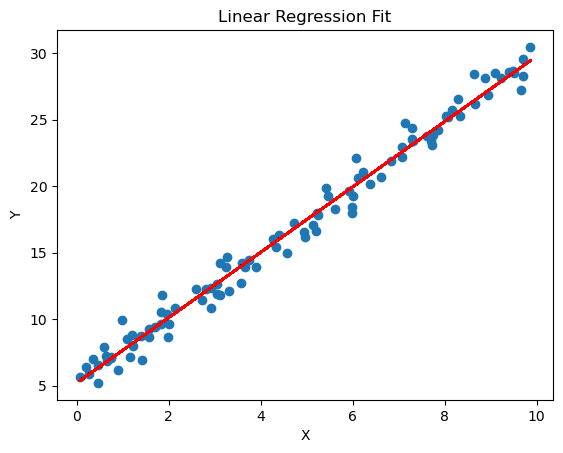

In [57]:
# driver code 
def main():
    # Generate random linear data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10     # 100 data points between 0 and 10
    true_slope = 2.5
    true_intercept = 5
    noise = np.random.randn(100, 1)     # Random noise

    # Create Y = 2.5*X + 5 + noise
    Y = true_slope * X + true_intercept + noise
    
    # Train model
    model = LinearRegression(learning_rate=0.0001, epochs=5000)
    model.fit(X, Y)

    # Predictions
    Y_pred = model.predict(X)

    # Evaluate
    
    print(f"Learned Weights: {model.W}, Bias: {model.b}")

    # Plot results
    plt.scatter(X, Y, label="Data")
    plt.plot(X, Y_pred, color='red', label="Prediction Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Regression Fit")
    plt.show()

main()